# Introduction

In this notebook we load the CRM accounts data, explore it through a series of plots and attempt to build some models from it.

In [76]:
import pandas as pd
import sklearn as sk  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Data normalisation

Columns such as `Industry` and `State Code` need to be transformed from text to numbers. We do this by creating a list of unique values and mapping each one to a number.

In [69]:
accounts = pd.read_csv('../data/crm_account.csv')
account_size = accounts['Number of employees']
account_industry = accounts['Industry']
account_state = accounts['State Code']
annual_revenue = accounts['Annual Revenue'].replace('[\$,]', '', regex=True).astype(float)
repeat_buyer = accounts['Num Opportunities Won'] > 1
color_map = ['blue' if r else 'black' for r in repeat_buyer]

# We need to map string columns to numerical representations
industry_mapping = {k:v for v,k in enumerate(account_industry.unique())}
state_mapping = {k:v for v,k in enumerate(account_state.unique())}

## Data exploration

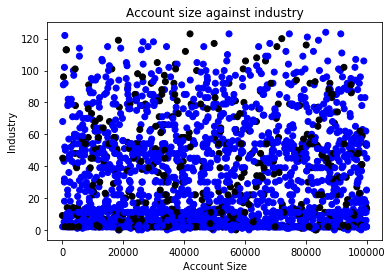

In [70]:
plt.scatter(account_size, account_industry.map(industry_mapping), c = color_map)
plt.xlabel('Account Size')
plt.ylabel('Industry')
plt.title('Account size against industry')
plt.show()

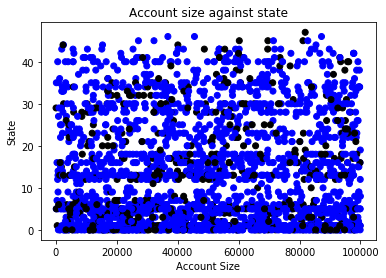

In [71]:
plt.scatter(account_size, account_state.map(state_mapping), c = color_map)
plt.xlabel('Account Size')
plt.ylabel('State')
plt.title('Account size against state')
plt.show()

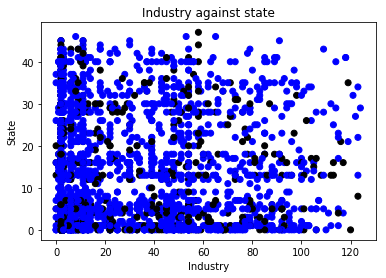

In [72]:
plt.scatter(account_industry.map(industry_mapping), account_state.map(state_mapping), c = color_map)
plt.xlabel('Industry')
plt.ylabel('State')
plt.title('Industry against state')
plt.show()

# Model training

We use a logistic regression model and a support vector machine with radial basis function to predict which customers will be repeat buyers. 

In [77]:
x = pd.concat([account_size, account_industry.map(industry_mapping), account_state.map(state_mapping), annual_revenue], axis=1)
y = repeat_buyer

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=109)


In [78]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(x_train, y_train)
y_predictions = lr.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_predictions))
print("Precision:", metrics.precision_score(y_test, y_predictions, average=None))
print("Recall:", metrics.recall_score(y_test, y_predictions, average=None))

('Accuracy:', 0.8013333333333333)
('Precision:', array([0.        , 0.80133333]))
('Recall:', array([0., 1.]))


In [75]:
from sklearn import svm

svc = svm.NuSVC(gamma='auto', nu=0.4)
svc.fit(x_train, y_train)

y_predictions = svc.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_predictions))
print("Precision:", metrics.precision_score(y_test, y_predictions))
print("Recall:", metrics.recall_score(y_test, y_predictions))

('Accuracy:', 0.8013333333333333)
('Precision:', 0.8013333333333333)
('Recall:', 1.0)
